In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import cmath

# Probe Data

In [7]:
probe_data = pd.read_csv('../Collaboration Data 10_5_2022/Pulse Data 10_5_2022/Probe_ETemporal.dat', header=None, sep=' ')
display(probe_data)

,0,1,2,3,4
0,-271.700000,5.669956e-06,14.338298,0.000072,0.000200
1,-269.577344,7.490865e-06,14.244554,0.000104,0.000221
2,-267.454687,8.215225e-06,14.114551,0.000139,0.000216
3,-265.332031,8.256109e-06,13.947087,0.000173,0.000190
4,-263.209375,8.130241e-06,13.752950,0.000205,0.000152
...,...,...,...,...,...
251,261.086719,1.933412e-08,7.940614,0.000006,0.000011
252,263.209375,1.084391e-07,8.155911,0.000007,0.000029
253,265.332031,5.624846e-07,8.188966,0.000014,0.000066
254,267.454687,1.748130e-06,8.167591,0.000028,0.000115


# Signals with different k-points

## Time and Delay time Data

In [8]:

time_data = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/Time.txt", header=None, sep='\t')
delaytime_data = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/Time_Delay.txt", header=None, sep='\t')
display(time_data)
display(delaytime_data)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,-801.025877,-796.980292,-792.934707,-788.889121,-784.843536,-780.797951,-776.752366,-772.70678,-768.661195,-764.61561,...,461.196717,465.242302,469.287888,473.333473,477.379058,481.424643,485.470229,489.515814,493.561399,497.606984


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,53.33328,53.13328,52.93328,52.733281,52.533281,52.333281,52.133281,51.933281,51.733282,51.533282,...,-24.866642,-25.066642,-25.266641,-25.466641,-25.666641,-25.866641,-26.066641,-26.26664,-26.46664,-26.66664


In [113]:
# df = pd.read_csv('./kx_4_ky_4/datafile.csv', header=None)
# df = df.drop(axis=1, columns=range(1,140))
# df.to_csv('./kx_4_ky_4/datafile.csv', header=None, index=None)

In [115]:
# df = pd.read_csv('./kx_4_ky_4/datafile.csv', header=None)
# df.head()

In [9]:
# theory_df = pd.read_csv('../more_delay/MgO_moredelay.csv', header=None)
theory_df = pd.read_csv('datafile_high_intensity.csv', header=None)
theory_df01 = pd.read_csv('./kx_0_ky_1/datafile.csv', header=None)
theory_df02 = pd.read_csv('./kx_0_ky_2/datafile.csv', header=None)
theory_df03 = pd.read_csv('./kx_0_ky_3/datafile.csv', header=None)
theory_df04 = pd.read_csv('./kx_0_ky_4/datafile.csv', header=None)
theory_df05 = pd.read_csv('./kx_0_ky_5/datafile.csv', header=None)
# theory_df10 = pd.read_csv('./kx_1_ky_0/datafile.csv', header=None)
theory_df20 = pd.read_csv('./kx_2_ky_0/datafile.csv', header=None)
theory_df30 = pd.read_csv('./kx_3_ky_0/datafile.csv', header=None)
theory_df40 = pd.read_csv('./kx_4_ky_0/datafile.csv', header=None)
theory_df50 = pd.read_csv('./kx_5_ky_0/datafile.csv', header=None)
theory_df11 = pd.read_csv('./kx_1_ky_1/datafile.csv', header=None)
theory_df22 = pd.read_csv('./kx_2_ky_2/datafile.csv', header=None)
theory_df33 = pd.read_csv('./kx_3_ky_3/datafile.csv', header=None)
theory_df44 = pd.read_csv('./kx_4_ky_4/datafile.csv', header=None)
theory_df55 = pd.read_csv('./kx_5_ky_5/datafile.csv', header=None)
display(theory_df.shape)
display(theory_df01.shape)
display(theory_df02.shape)
display(theory_df03.shape)
display(theory_df04.shape)
display(theory_df05.shape)
display(theory_df20.shape)
display(theory_df30.shape)
display(theory_df40.shape)
display(theory_df50.shape)
display(theory_df11.shape)
display(theory_df22.shape)
display(theory_df33.shape)
display(theory_df44.shape)
display(theory_df55.shape)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

(301, 102)

In [10]:
print(len(theory_df.axes[0]))

301


In [10]:
# theory_data = np.zeros((len(theory_df.axes[0]), len(theory_df.axes[1])), dtype=complex)
# for i in range(len(theory_df.axes[0])):
#     theory_data[i][0] = theory_df[0][i]
#     for j in range(1, len(theory_df.axes[1])):
#         theory_data[i][j] = complex((theory_df[j][i][:-2] + 'j').replace("*^","e"))

# w0 = 2.35
# e_data = 1j*w0*theory_data[:, 1:]

In [ ]:
# np.savetxt('E_field_data.csv', e_data, delimiter=',')

In [ ]:
# abs_data = np.zeros((len(theory_df.axes[0]), len(theory_df.axes[1]-1)))
# arg_data = np.zeros((len(theory_df.axes[0]), len(theory_df.axes[1]-1)))
# for i in range(len(theory_df.axes[0])):
#     for j in range(len(theory_df.axes[1])-1):
#         (abs_data[i,j], arg_data[i,j]) = cmath.polar(e_data[i,j]) 

In [77]:
# class extract_data():
    
#     def __init__(self, filename) -> None:
#         self.filename = filename
    
#     def get_dataframe(self):
#         df = pd.read_csv(self.filename, header=None)
#         return df
        
#     def abs_and_arg(self):
#         df = self.get_dataframe()
#         theory_data = np.zeros((len(df.axes[0]), len(df.axes[1])), dtype=complex)
#         for i in range(len(df.axes[0])):
#             theory_data[i][0] = df[0][i]
#             for j in range(1, len(df.axes[1])):
#                 theory_data[i][j] = complex((df[j][i][:-2] + 'j').replace("*^","e"))

#         w0 = 2.35
#         e_data = 1j*w0*theory_data[:, 1:]
        
#         abs_data = np.zeros((len(df.axes[0]), len(df.axes[1]-1)))
#         arg_data = np.zeros((len(df.axes[0]), len(df.axes[1]-1)))
#         for i in range(len(df.axes[0])):
#             for j in range(len(df.axes[1])-1):
#                 (abs_data[i,j], arg_data[i,j]) = cmath.polar(e_data[i,j])
#         return abs_data, arg_data


In [78]:
# file1 = extract_data('./kx_5_ky_5/datafile.csv')
# file1.get_dataframe().head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,-150,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,...,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I,0.+0.*I
1,-149,4.653738353325367*^-14-5.787818484049038*^-14*I,4.493699818768633*^-14-5.568705260543218*^-14*I,4.332969866126209*^-14-5.351113461687083*^-14*I,4.1726448969354134*^-14-5.1369162279208683*^-14*I,4.011873426647882*^-14-4.9270063301535785*^-14*I,3.856158050961564*^-14-4.7226260832601326*^-14*I,3.7023626901368506*^-14-4.5199990026933656*^-14*I,3.5521207912052384*^-14-4.325549254025599*^-14*I,3.4086632743973284*^-14-4.134987905383997*^-14*I,...,2.1883744543636298*^-17-2.350088903130832*^-17*I,2.0608656973146988*^-17-2.3122572367192166*^-17*I,2.013173900615775*^-17-2.33250983477194*^-17*I,2.0141439270526213*^-17-2.4068224224894223*^-17*I,2.0854608983618555*^-17-2.4886885571197008*^-17*I,2.1100220163020322*^-17-2.596786481112143*^-17*I,2.20194792824455*^-17-2.780230527935008*^-17*I,2.2872190748407458*^-17-2.9199456580931936*^-17*I,2.3427290116034032*^-17-3.131631299138569*^-17*I,2.414688726370213*^-17-3.346855387322608*^-17*I
2,-148,9.419696839249872*^-14-6.721365036036*^-14*I,9.120715940625623*^-14-6.489541860434953*^-14*I,8.82512782550451*^-14-6.260148815050814*^-14*I,8.530310499825061*^-14-6.036222921846601*^-14*I,8.239414376880763*^-14-5.815865271124509*^-14*I,7.949780062826125*^-14-5.597545426534647*^-14*I,7.662221581486312*^-14-5.382042200947513*^-14*I,7.377095693495227*^-14-5.1694497545179705*^-14*I,7.096707762181855*^-14-4.958894685877062*^-14*I,...,4.968120565725041*^-17-2.1687102038070863*^-17*I,4.3984702698372466*^-17-1.9378363217929533*^-17*I,3.9091264883735773*^-17-1.7849354603338783*^-17*I,3.521117095859939*^-17-1.6174661923057177*^-17*I,3.1832425307965583*^-17-1.4979818182835615*^-17*I,2.946918825412725*^-17-1.4192870606422036*^-17*I,2.795037189995769*^-17-1.3844382963696067*^-17*I,2.7302891546801336*^-17-1.3772043647055274*^-17*I,2.6983879529649467*^-17-1.4401988827972423*^-17*I,2.7655435938540737*^-17-1.5531045734352388*^-17*I
3,-147,5.524265173516272*^-14-3.769755877368832*^-14*I,5.403600877744034*^-14-3.682634855999012*^-14*I,5.284919163302863*^-14-3.594312472314618*^-14*I,5.16130577920056*^-14-3.501361961963166*^-14*I,5.036477511071185*^-14-3.4102780590666626*^-14*I,4.9118798909304105*^-14-3.3174751675283036*^-14*I,4.787853981189751*^-14-3.2240381966446424*^-14*I,4.661431108598908*^-14-3.129207716133121*^-14*I,4.535853533969702*^-14-3.038127328498659*^-14*I,...,4.098594218780041*^-17-1.9602597814281687*^-17*I,3.3521525152517563*^-17-1.4266854421325556*^-17*I,2.588576535280219*^-17-9.847000031550446*^-18*I,1.9567260667659493*^-17-6.2113483397860345*^-18*I,1.362196431647163*^-17-2.8211985445812164*^-18*I,8.241338425212449*^-18+1.1477415554316513*^-19*I,2.9786973530642208*^-18+2.371003406690127*^-18*I,-1.143544604488082*^-18+4.133291493396505*^-18*I,-5.462182065091224*^-18+6.184782296979273*^-18*I,-9.30753689447404*^-18+7.160789788455836*^-18*I
4,-146,2.217496331740111*^-14-8.913664162012747*^-14*I,2.2486399655369382*^-14-8.704128743934313*^-14*I,2.2716985793562725*^-14-8.490180505235783*^-14*I,2.287623912039461*^-14-8.273924951531445*^-14*I,2.296528739859813*^-14-8.055471129557044*^-14*I,2.300753109451076*^-14-7.834413571271099*^-14*I,2.297494821918344*^-14-7.611576678787648*^-14*I,2.2914699818006028*^-14-7.391466210530537*^-14*I,2.2835198445087916*^-14-7.170351350338366*^-14*I,...,9.132984335401198*^-17-1.1149579401378858*^-16*I,7.583376387096354*^-17-9.686437146588343*^-17*I,6.310236831852873*^-17-8.469248091867936*^-17*I,5.264828219415338*^-17-7.467636741127534*^-17*I,4.3847121020334956*^-17-6.552342940496688*^-17*I,3.552750845093611*^-17-5.805369519177316*^-17*I,2.88157953997013*^-17-5.1540662240243585*^-17*I,2.2052579359387413*^-17-4.5224518601433*^-17*I,1.553839187772567*^-17-3.9906922514341*^-17*I,9.366541055967746*^-18-3.499152460978401*^-17*I


In [13]:
def band_filter(x):
    ar = []
    for i in x:
        if i >= 0.3 and i <=0.5:
            ar.append(1)
        else:
            ar.append(0)
    return np.array(ar)

In [54]:
from numpy.fft import fft, fftfreq, ifft
def filter_data(time, data):
    filtered_data = []
    w0 = 2.35
    for j in range(data.shape[1]):
        signal = data[:,j]*np.exp(1j*w0*time)
        signal_fft = fft(signal)
        x_freq = fftfreq(len(time), d=1)
        filter_signal = signal_fft * band_filter(x_freq)
        filtered_data.append(ifft(filter_signal)*np.exp(-1j*w0*time))
    return np.transpose(np.array(filtered_data))

In [45]:
theory_data = np.zeros((len(theory_df.axes[0]), len(theory_df.axes[1])), dtype=complex)
for i in range(len(theory_df.axes[0])):
    theory_data[i][0] = theory_df[0][i]
    for j in range(1, len(theory_df.axes[1])):
        theory_data[i][j] = complex((theory_df05[j][i][:-2] + 'j').replace("*^","e"))

w0 = 2.35
e_data = 1j*w0*theory_data[:, 1:]

In [50]:
e_data.shape

(301, 101)

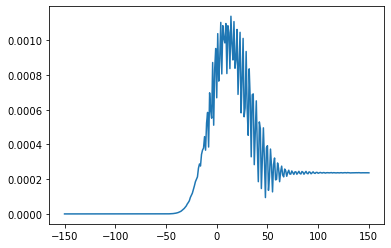

In [57]:
plt.plot(theory_df05.iloc[:,0].values, np.abs(e_data[:,50]))

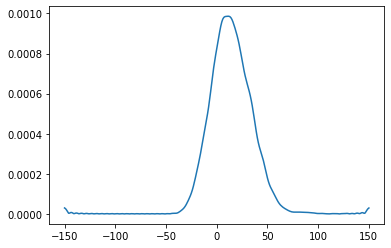

In [58]:
plt.plot(theory_df05.iloc[:,0].values, np.abs(filter_data(theory_df05.iloc[:,0].values, e_data)[:,50]))

In [59]:
def abs_and_arg(df):
    theory_data = np.zeros((len(df.axes[0]), len(df.axes[1])), dtype=complex)
    for i in range(len(df.axes[0])):
        theory_data[i][0] = df[0][i]
        for j in range(1, len(df.axes[1])):
            theory_data[i][j] = complex((df[j][i][:-2] + 'j').replace("*^","e"))

    w0 = 2.35
    e_data = 1j*w0*theory_data[:, 1:]
    e_data = filter_data(df.iloc[:,0].values, e_data)
    
    abs_data = np.zeros((len(df.axes[0]), len(df.axes[1])-1))
    arg_data = np.zeros((len(df.axes[0]), len(df.axes[1])-1))
    for i in range(len(df.axes[0])):
        for j in range(len(df.axes[1])-1):
            (abs_data[i,j], arg_data[i,j]) = cmath.polar(e_data[i,j])
    return abs_data, arg_data

In [60]:
a, b = abs_and_arg(theory_df05)

In [61]:
def max_E_index(df, i):
    abs_data, _ = abs_and_arg(df)
    return max(range(len(abs_data[:,i])), key = abs_data[:,i].__getitem__)

## Intensity Data

In [62]:
E_data1_45 = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/E_t_Amp_Avg.txt", header=None, sep='\t')
display(E_data1_45)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,697.649599,617.843719,516.262331,435.867470,384.078003,347.913588,383.179514,468.293695,573.202544,669.225789,...,1350.000142,1456.518575,1537.206886,1595.730369,1633.837388,1653.406542,1657.102578,1650.849940,1648.317718,1661.189842
1,601.895814,566.245857,518.220281,464.532441,435.909556,488.764853,563.284877,620.405436,645.675964,640.378591,...,1406.340615,1519.469134,1590.822046,1627.878162,1643.719948,1654.152284,1675.114159,1719.244686,1790.617507,1879.848704
2,738.291050,618.534069,488.567079,445.732611,489.741341,545.907614,614.616304,667.711877,678.112465,672.086529,...,841.765828,975.464064,1097.203201,1212.282317,1310.017415,1386.951144,1449.922389,1508.319888,1570.962903,1643.409291
3,694.835388,662.032858,643.421795,653.289580,688.001732,707.967049,711.904246,734.066199,759.523546,745.900722,...,1170.621731,1225.285529,1241.154307,1243.289208,1257.335975,1297.795270,1349.587602,1377.706979,1373.683341,1350.786169
4,658.224816,580.341559,517.167586,516.502117,558.019405,586.133654,599.434895,610.274008,628.020371,646.512541,...,890.314668,927.640490,906.103321,844.788188,785.792851,752.224797,735.045377,718.955843,692.873681,664.499842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,649.104802,687.977087,716.992355,735.372993,753.323712,770.387637,782.710507,787.985607,780.986322,763.447570,...,927.414571,866.334624,837.379476,828.005740,826.840950,825.728568,820.467694,916.450823,1009.321910,1085.627001
397,753.775456,778.832828,776.922239,767.123848,768.026547,765.980968,755.545068,736.279441,728.137002,748.193731,...,1617.222403,1707.600026,1805.041331,1892.533042,1966.563642,2028.609612,2081.548308,2127.076390,2164.716079,2191.368693
398,651.140509,663.227832,741.079650,833.763376,917.264166,980.944634,1016.557913,1016.098550,979.805651,916.874462,...,1999.821337,2087.019434,2168.437117,2242.080124,2306.403247,2361.271377,2408.929665,2453.780242,2500.298046,2549.255200
399,889.108707,943.693449,983.385349,1008.669401,1035.248513,1059.779003,1066.848865,1052.396052,1017.244431,968.627269,...,2521.742959,2615.840017,2685.980081,2733.240225,2759.442923,2766.622822,2756.180368,2727.678852,2678.049397,2602.242338


In [63]:
E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
print(max(range(len(E_data_delay)), key = E_data_delay.__getitem__))

170


In [64]:
print(delaytime_data.values[:,267])
print(np.arange(30,-31,-1)[30])

[-0.066667]
0


In [ ]:
# # print(np.arange(-150,150, 1)[100:701])
# summed_E_data_10 = np.zeros(len(theory_df.axes[1])-1)
# for i in range(len(theory_df.axes[1])-1):
#     summed_E_data_10[i] = np.sum(abs_data[100:701,i])

# # print(max(range(len(summed_E_data)), key = summed_E_data.__getitem__))
# # print(summed_E_data[19])
# # print(np.arange(210,-200,-10)[19])
# # print(summed_E_data[20])

In [69]:
def summed_abs(df):
    abs_data, _ = abs_and_arg(df)
    summed_abs_data = np.zeros(len(df.axes[1])-1)
    for i in range(len(df.axes[1])-1):
        summed_abs_data[i] = np.sum(abs_data[:,i])
    return np.array(summed_abs_data)

print(max(range(len(summed_abs(theory_df))), key = summed_abs(theory_df).__getitem__))

3


In [83]:
def correction_factor(theory, exp):
    return np.mean(exp)/np.mean(theory)

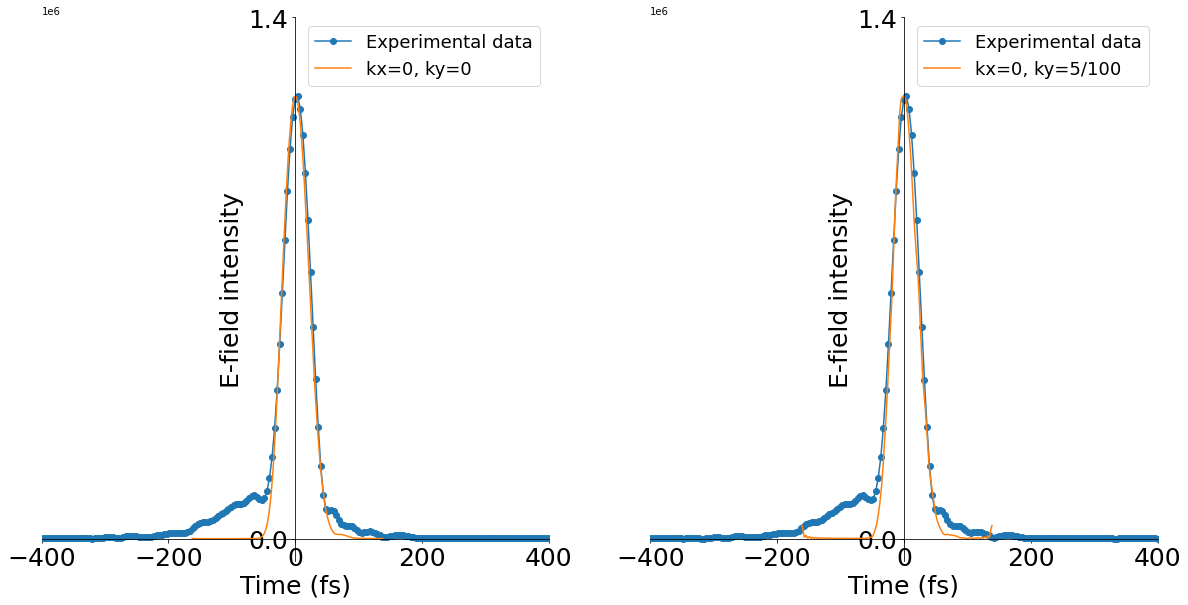

In [73]:
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)
ax[0].spines['left'].set_position('zero')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[1].spines['left'].set_position('zero')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')


abs_data, _ = abs_and_arg(theory_df)
abs_data05, _ = abs_and_arg(theory_df05)

delay_index = 267 # Index where time_delay is near 0
theory_delay_index = 50
correction_factor = max([E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))])/max(abs_data[:,theory_delay_index])
correction_factor05 = max([E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))])/max(abs_data05[:,theory_delay_index])


ax[0].plot([time_data[i][0] for i in range(len(time_data.axes[1]))], [E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))], '-o')
ax[0].plot(theory_df.iloc[:,0].values - theory_df.iloc[:,0].values[max_E_index(theory_df, theory_delay_index)], correction_factor*abs_data[:,theory_delay_index])
ax[1].plot([time_data[i][0] for i in range(len(time_data.axes[1]))], [E_data1_45[i][delay_index] for i in range(len(E_data1_45.axes[1]))], '-o')
ax[1].plot(theory_df05.iloc[:,0].values - theory_df05.iloc[:,0].values[max_E_index(theory_df05, theory_delay_index)], correction_factor05*abs_data05[:,theory_delay_index])
#Maxinmum value of E shifted to t=0
ax[0].legend(['Experimental data', 'kx=0, ky=0'],fontsize=18)
ax[1].legend(['Experimental data', 'kx=0, ky=5/100'],fontsize=18)

ax[0].set_xlabel("Time (fs)", fontsize=25)
ax[0].set_ylabel("E-field intensity", fontsize=25)

ax[1].set_xlabel("Time (fs)", fontsize=25)
ax[1].set_ylabel("E-field intensity", fontsize=25)

ax[0].tick_params(axis='x', labelsize=25)
ax[0].tick_params(axis='y', labelsize=25)
ax[1].tick_params(axis='x', labelsize=25)
ax[1].tick_params(axis='y', labelsize=25)
ax[0].set_yticks([0, 1.4*(10**6)])
ax[1].set_yticks([0, 1.4*(10**6)])
ax[0].set_xlim([-400,400])
ax[1].set_xlim([-400,400])
plt.show()

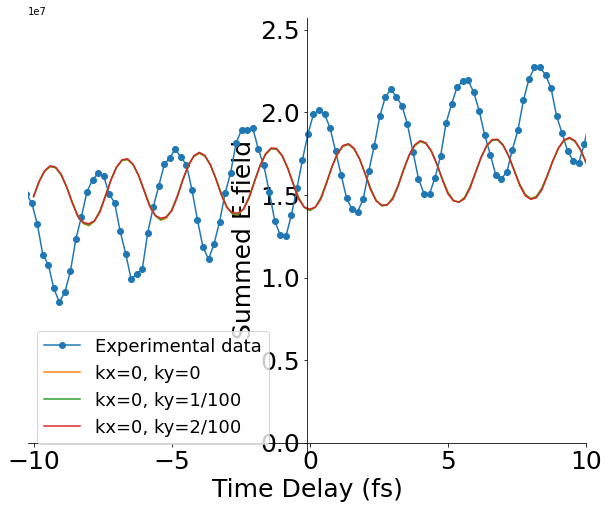

In [86]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

t_delay = np.arange(30,-30,-1)#Remember that by subtracting a tau you are advancing the pusle, not delaying
E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# correction_factor_10 = max(E_data_delay)/max(summed_E_data_10)
# correction_factor = max(E_data_delay)/max(summed_abs_data)
# correction_factor_02 = max(E_data_delay)/max(summed_E_data_02)

plt.plot([delaytime_data[i][0] for i in range(len(delaytime_data.axes[1]))], E_data_delay,"-o")
# plt.plot(t_delay, correction_factor_10*summed_E_data_10,"-*")
plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df), E_data_delay)*summed_abs(theory_df),"-")
plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df01), E_data_delay)*summed_abs(theory_df01),"-")
plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df02), E_data_delay)*summed_abs(theory_df02),"-")
# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df03), E_data_delay)*summed_abs(theory_df03),"-")
# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df04), E_data_delay)*summed_abs(theory_df04),"-")
# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df05), E_data_delay)*summed_abs(theory_df05),"-")
# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df_I3), E_data_delay)*summed_abs(theory_df_I3),"-")
# plt.plot(np.arange(30,-30.2,-0.2), correction_factor_02*summed_E_data_02)
plt.xlabel("Time Delay (fs)", fontsize=25)
plt.ylabel("Summed E-field ", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.legend(['Experimental data','kx=0, ky=0', 'kx=0, ky=1/100','kx=0, ky=2/100','kx=0, ky=3/100','kx=0, ky=4/100','kx=0, ky=5/100'],fontsize=18)
plt.xlim([-10.2,10])
plt.show()

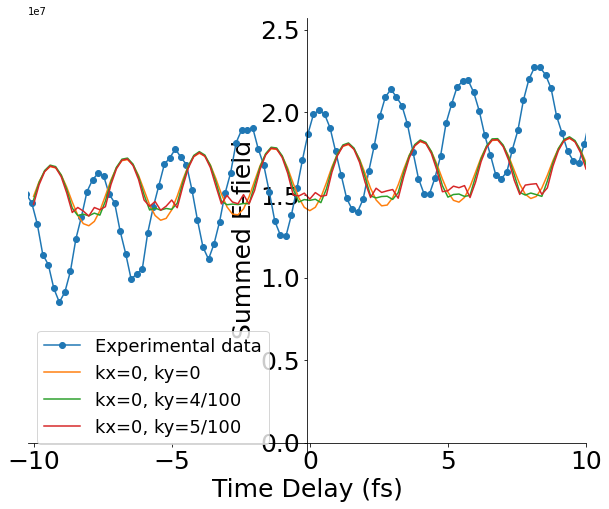

In [109]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

t_delay = np.arange(30,-30,-1)#Remember that by subtracting a tau you are advancing the pusle, not delaying
E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# correction_factor_10 = max(E_data_delay)/max(summed_E_data_10)
# correction_factor = max(E_data_delay)/max(summed_abs_data)
# correction_factor_02 = max(E_data_delay)/max(summed_E_data_02)

plt.plot([delaytime_data[i][0] for i in range(len(delaytime_data.axes[1]))], E_data_delay,"-o")
# plt.plot(t_delay, correction_factor_10*summed_E_data_10,"-*")
plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df), E_data_delay)*summed_abs(theory_df),"-")
# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df01), E_data_delay)*summed_abs(theory_df01),"-")
# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df02), E_data_delay)*summed_abs(theory_df02),"-")
# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df03), E_data_delay)*summed_abs(theory_df03),"-")
plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df04), E_data_delay)*summed_abs(theory_df04),"-")
plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df05), E_data_delay)*summed_abs(theory_df05),"-")
# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df_I3), E_data_delay)*summed_abs(theory_df_I3),"-")
# plt.plot(np.arange(30,-30.2,-0.2), correction_factor_02*summed_E_data_02)
plt.xlabel("Time Delay (fs)", fontsize=25)
plt.ylabel("Summed E-field ", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.legend(['Experimental data','kx=0, ky=0', 'kx=0, ky=4/100','kx=0, ky=5/100'],fontsize=18)
plt.xlim([-10.2,10])
plt.show()

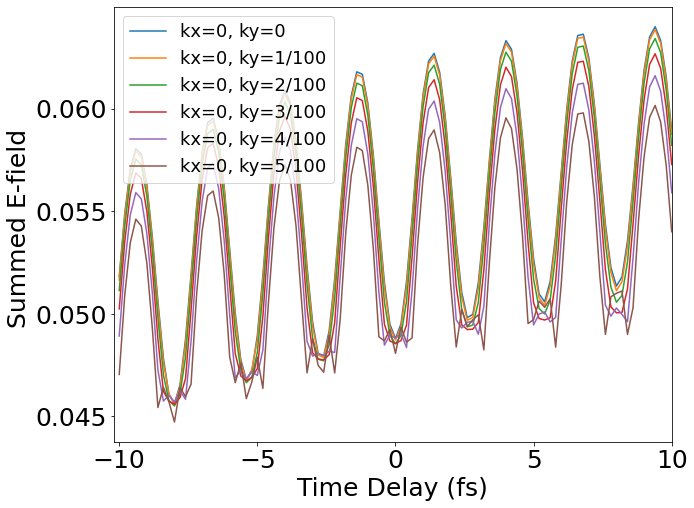

In [92]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

t_delay = np.arange(30,-30,-1)#Remember that by subtracting a tau you are advancing the pusle, not delaying
E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# correction_factor_10 = max(E_data_delay)/max(summed_E_data_10)
# correction_factor = max(E_data_delay)/max(summed_abs_data)
# correction_factor_02 = max(E_data_delay)/max(summed_E_data_02)

# plt.plot([delaytime_data[i][0] for i in range(len(delaytime_data.axes[1]))], E_data_delay,"-o")
# plt.plot(t_delay, correction_factor_10*summed_E_data_10,"-*")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df01),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df02),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df03),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df04),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df05),"-")
# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df_I3), E_data_delay)*summed_abs(theory_df_I3),"-")
# plt.plot(np.arange(30,-30.2,-0.2), correction_factor_02*summed_E_data_02)
plt.xlabel("Time Delay (fs)", fontsize=25)
plt.ylabel("Summed E-field ", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# plt.legend(['Experimental data', 'I = 0.5 TW/cm^2','I = 0.7 TW/cm^2','I = 1 TW/cm^2','I = 1.5 TW/cm^2','I = 2 TW/cm^2', 'I = 2.5 TW/cm^2', 'I = 3 TW/cm^2'],fontsize=18)
plt.legend(['kx=0, ky=0', 'kx=0, ky=1/100','kx=0, ky=2/100','kx=0, ky=3/100','kx=0, ky=4/100','kx=0, ky=5/100'],fontsize=18)
plt.xlim([-10.2,10])
plt.show()

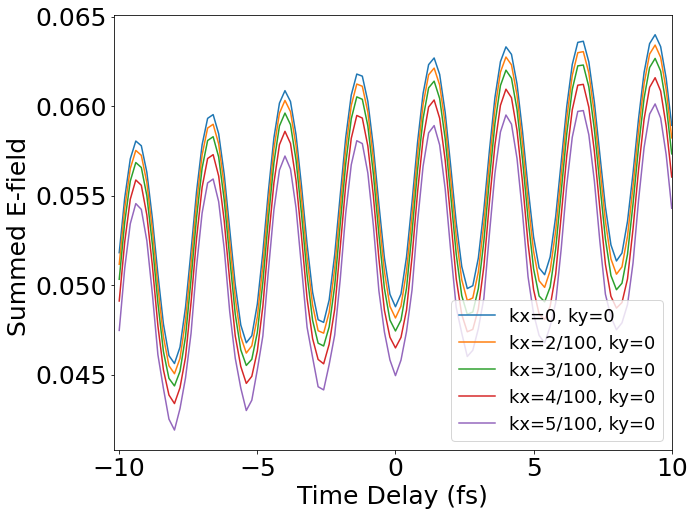

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

t_delay = np.arange(30,-30,-1)#Remember that by subtracting a tau you are advancing the pusle, not delaying
E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# correction_factor_10 = max(E_data_delay)/max(summed_E_data_10)
# correction_factor = max(E_data_delay)/max(summed_abs_data)
# correction_factor_02 = max(E_data_delay)/max(summed_E_data_02)

# plt.plot([delaytime_data[i][0] for i in range(len(delaytime_data.axes[1]))], E_data_delay,"-o")
# plt.plot(t_delay, correction_factor_10*summed_E_data_10,"-*")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df),"-")
# plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df10),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df20),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df30),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df40),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df50),"-")

# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df_I3), E_data_delay)*summed_abs(theory_df_I3),"-")
# plt.plot(np.arange(30,-30.2,-0.2), correction_factor_02*summed_E_data_02)
plt.xlabel("Time Delay (fs)", fontsize=25)
plt.ylabel("Summed E-field ", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# plt.legend(['Experimental data', 'I = 0.5 TW/cm^2','I = 0.7 TW/cm^2','I = 1 TW/cm^2','I = 1.5 TW/cm^2','I = 2 TW/cm^2', 'I = 2.5 TW/cm^2', 'I = 3 TW/cm^2'],fontsize=18)
plt.legend(['kx=0, ky=0', 'kx=2/100, ky=0', 'kx=3/100, ky=0','kx=4/100, ky=0','kx=5/100, ky=0'],fontsize=18)
plt.xlim([-10.2,10])
plt.show()

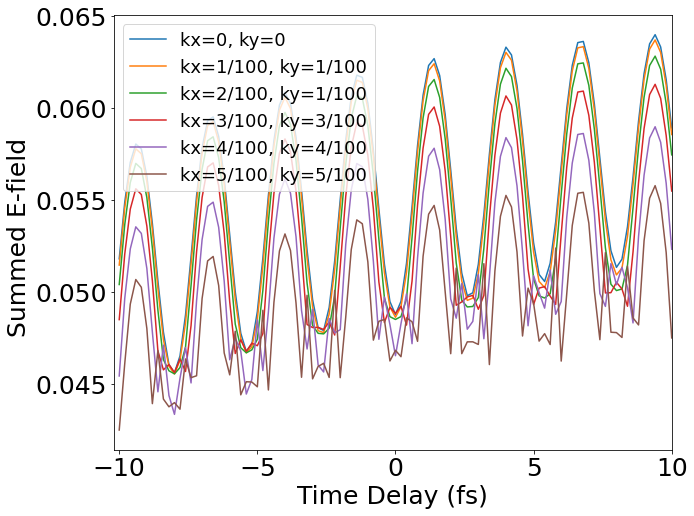

In [90]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

t_delay = np.arange(30,-30,-1)#Remember that by subtracting a tau you are advancing the pusle, not delaying
E_data_delay = [np.sum([E_data1_45[i][j] for i in range(len(E_data1_45.axes[1]))]) for j in range(len(E_data1_45.axes[0]))]
# correction_factor_10 = max(E_data_delay)/max(summed_E_data_10)
# correction_factor = max(E_data_delay)/max(summed_abs_data)
# correction_factor_02 = max(E_data_delay)/max(summed_E_data_02)

# plt.plot([delaytime_data[i][0] for i in range(len(delaytime_data.axes[1]))], E_data_delay,"-o")
# plt.plot(t_delay, correction_factor_10*summed_E_data_10,"-*")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df11),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df22),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df33),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df44),"-")
plt.plot(np.arange(10, -10.2, -0.2), summed_abs(theory_df55),"-")

# plt.plot(np.arange(10, -10.2, -0.2), correction_factor(summed_abs(theory_df_I3), E_data_delay)*summed_abs(theory_df_I3),"-")
# plt.plot(np.arange(30,-30.2,-0.2), correction_factor_02*summed_E_data_02)
plt.xlabel("Time Delay (fs)", fontsize=25)
plt.ylabel("Summed E-field ", fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# plt.legend(['Experimental data', 'I = 0.5 TW/cm^2','I = 0.7 TW/cm^2','I = 1 TW/cm^2','I = 1.5 TW/cm^2','I = 2 TW/cm^2', 'I = 2.5 TW/cm^2', 'I = 3 TW/cm^2'],fontsize=18)
plt.legend(['kx=0, ky=0', 'kx=1/100, ky=1/100', 'kx=2/100, ky=1/100','kx=3/100, ky=3/100','kx=4/100, ky=4/100', 'kx=5/100, ky=5/100'],fontsize=18)
plt.xlim([-10.2,10])
plt.show()

## Phase Data

In [94]:
phase_data1_45 = pd.read_csv("../Collaboration Data 10_5_2022/Data Collection 1/45deg/E_t_Phase_Avg.txt", header=None, sep='\t')
display(phase_data1_45)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
0,4.841584,4.890753,4.970150,5.019605,5.118449,5.216049,5.439065,5.340410,5.278911,5.327447,...,12.398283,12.566238,12.748619,12.943448,13.150333,13.369252,13.600892,13.850375,14.119608,14.384484
1,-0.148239,-0.194996,-0.202665,-0.082619,0.089137,0.139359,0.203582,0.268221,0.372152,0.543262,...,8.763271,8.924777,9.090705,9.270876,9.470527,9.690989,9.930632,10.183464,10.433775,10.661044
2,3.588963,3.523746,3.492707,3.692107,3.933738,4.211403,4.558374,4.722541,4.810278,4.876170,...,3.314977,3.425332,3.596544,3.779993,3.934587,4.075551,4.213589,4.350507,4.486045,4.618184
3,12.173181,12.211591,12.296403,12.302655,12.231121,12.242935,12.332409,12.168098,12.185019,12.243777,...,2.158649,2.225566,2.330700,2.481583,2.676422,2.911378,3.074573,3.166492,3.232395,3.295408
4,16.494421,16.484357,16.421835,16.200284,16.204162,16.283988,16.383824,16.478386,16.552826,16.607546,...,1.684194,1.694519,1.733648,1.833524,2.019538,2.175284,2.296397,2.360089,2.375085,2.123306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,6.743724,6.834429,6.889913,6.952439,7.065999,7.091291,7.061026,7.004198,6.959233,6.929459,...,7.652756,7.637673,7.667353,7.697476,7.700534,7.700331,7.778312,7.648768,7.612054,7.610226
397,1.405209,1.406104,1.427357,1.506583,1.527720,1.488123,1.444950,1.478813,1.674894,1.743755,...,2.604190,2.730580,2.793293,2.843611,2.896935,2.955527,3.016485,3.075532,3.129563,3.176134
398,4.389503,4.572239,4.612939,4.572377,4.485291,4.365735,4.244009,4.135870,4.043086,3.967729,...,-1.633881,-1.623236,-1.596991,-1.558765,-1.511449,-1.456683,-1.395211,-1.327879,-1.256989,-1.187084
399,4.317672,4.192745,4.073438,3.997938,4.009091,3.916573,3.805940,3.710167,3.639558,3.598629,...,-2.922530,-2.933313,-2.928566,-2.910563,-2.881581,-2.843960,-2.800293,-2.753396,-2.705651,-2.658038


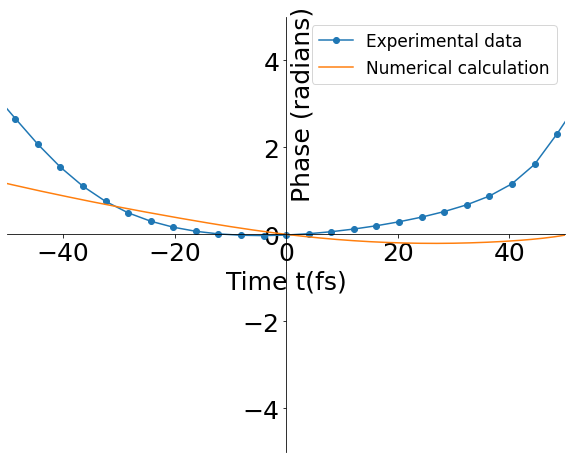

In [95]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = probe_data[:][0]
x1 = x[np.logical_and(x>=-50, x<=50)]

y = np.unwrap(probe_data[:][2])
delay_index = 267
theory_delay_index = 50

_, arg_data = abs_and_arg(theory_df)
x = theory_df.iloc[:,0].values
plt.plot([time_data[i][0] for i in range(len(time_data.axes[1]))], [phase_data1_45[i][delay_index] for i in range(len(phase_data1_45.axes[1]))], '-o')
plt.plot(x - x[max_E_index(theory_df, theory_delay_index)], np.unwrap(arg_data[:,theory_delay_index]) - np.unwrap(arg_data[:,theory_delay_index])[max_E_index(theory_df, theory_delay_index)])
# plt.plot(probe_data[:][0], np.unwrap(probe_data[:][2]), '-*')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe phase'], fontsize=17)
plt.xlabel("Time t(fs)", fontsize=25)
plt.ylabel("Phase (radians)", fontsize=25)
ax.yaxis.set_label_coords(0.55,0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
# ax.set_yticks([0, 1.4*(10**6)])
plt.ylim([-5,5])
plt.xlim([-50,50])
plt.show()

### Curve fitting of Phase Data

In [96]:
def phase_fun(t, phi_0, a, b, c, d):
    return phi_0 + a*t + b*(t)**2 + c*(t)**3 + d*(t)**4
# def phase_fun(t, phi_0, t0, b, c, d):
#     return phi_0 + b*(t-t0)**2 + c*(t-t0)**3 + d*(t-t0)**4

[2.34734103e-02 6.41428098e-03 3.68670497e-04 3.78438277e-06
 3.53841867e-07]


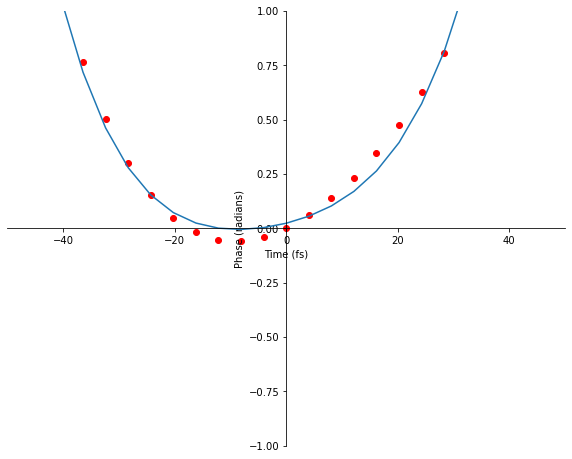

In [97]:
delay_index = 200
x = np.array([float(time_data[i][0]) for i in range(len(time_data.axes[1]))])
x1 = x[np.logical_and(x>=-50, x<=50)]

y = np.array([phase_data1_45[i][delay_index] for i in range(len(phase_data1_45.axes[1]))])
y1 = y[np.logical_and(x>=-50, x<=50)]

param, param_cov = curve_fit(phase_fun, x1, y1)
print(param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param[0], param[1], param[2], param[3], param[4]) for t in x1])
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-50,50])
plt.ylim([-1,1])
plt.show()

[ 3.16657097e-03 -1.51457886e-02  2.34641198e-04  1.32001953e-06
 -3.62944720e-09]


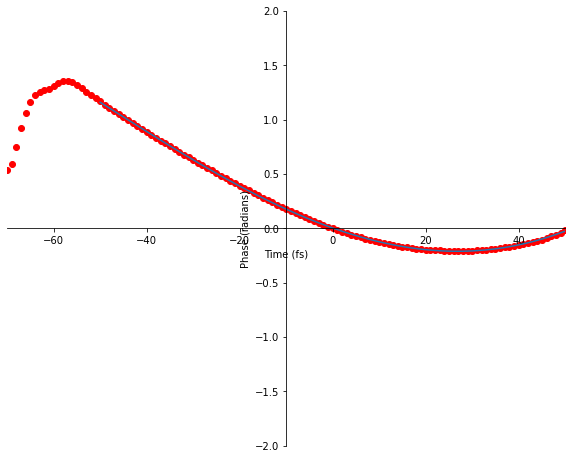

In [98]:
delay_index = 50
x = theory_df.iloc[:,0].values - theory_df.iloc[:,0].values[max_E_index(theory_df, delay_index)]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(theory_df, delay_index)]
y1 = y[delaytime_range]


param, param_cov = curve_fit(phase_fun, x1, y1)
print(param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# print(np.arange(-200,210,10)[delay_index])
plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, param[0], param[1], param[2], param[3], param[4]) for t in x1])
plt.xlabel("Time (fs)")
plt.ylabel("Phase (radians)")
plt.xlim([-70,50])
plt.ylim([-2,2])
plt.savefig("phase.png")
plt.show()

[ 1.39071109e-04 -1.17424405e-03  6.93499625e-05  2.40954296e-07
  3.38175600e-08]


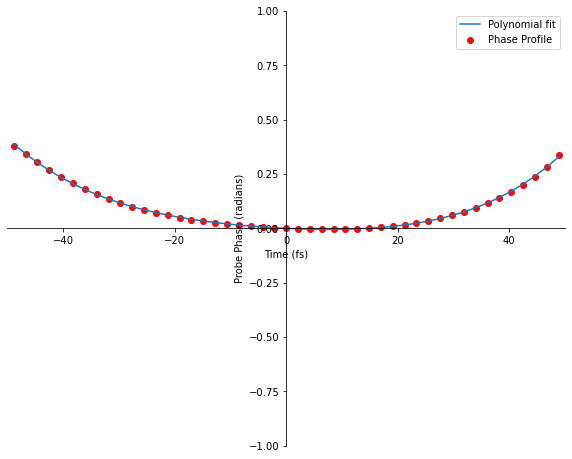

In [99]:
x = probe_data[:][0]
x1 = x[np.logical_and(x>=-50, x<=50)]

y = np.unwrap(probe_data[:][2])
y1 = y[np.logical_and(x>=-50, x<=50)]

probe_param, probe_param_cov = curve_fit(phase_fun, x1, y1)
print(probe_param)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(x, y, color='red')
plt.plot(x1, [phase_fun(t, probe_param[0], probe_param[1], probe_param[2], probe_param[3], probe_param[4]) for t in x1])
plt.legend(['Polynomial fit', 'Phase Profile'])
plt.xlabel("Time (fs)")
plt.ylabel("Probe Phase (radians)")
plt.xlim([-50,50])
plt.ylim([-1,1])
plt.show()

In [100]:
delaytime_array = np.array(delaytime_data)[0] #Reverses the array as it was not sorted
x = np.array([float(time_data[i][0]) for i in range(len(time_data.axes[1]))])
delaytime_range = np.logical_and(x>=-50, x<=50)

b_parameter = np.zeros(len(delaytime_array))
c_parameter = np.zeros(len(delaytime_array))
for delay_i in range(len(delaytime_array)):
    x1 = x[delaytime_range]

    y = np.array([phase_data1_45[i][delay_i] for i in range(len(phase_data1_45.axes[1]))])
    y1 = y[delaytime_range]
    
    E_data_delay = np.array([E_data1_45[i][delay_i] for i in range(len(E_data1_45.axes[1]))])
    param, param_cov = curve_fit(phase_fun, x1, y1)
    b_parameter[delay_i] = param[2]
    c_parameter[delay_i] = param[3]

In [101]:
def chirp_param(df):
    _, arg_data = abs_and_arg(df)
    theory_b_parameter = np.zeros(len(df.axes[1])-1)
    theory_c_parameter = np.zeros(len(df.axes[1])-1)
    for delay_index in range(len(df.axes[1])-1):
        x = df.iloc[:, 0].values - df.iloc[:,0].values[max_E_index(df, delay_index)]
        x1 = x[np.logical_and(x>=-50, x<=50)]

        y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(df, delay_index)]
        y1 = y[np.logical_and(x>=-50, x<=50)]
        
        theory_param, theory_param_cov = curve_fit(phase_fun, x1, y1)
        theory_b_parameter[delay_index] = theory_param[2]
        theory_c_parameter[delay_index] = theory_param[3]
    
    return theory_b_parameter, theory_c_parameter

In [102]:
theory_b_param, theory_c_param = chirp_param(theory_df)
theory_b_param01, theory_c_param01 = chirp_param(theory_df01)
theory_b_param02, theory_c_param02 = chirp_param(theory_df02)
theory_b_param03, theory_c_param03 = chirp_param(theory_df03)
theory_b_param04, theory_c_param04 = chirp_param(theory_df04)
theory_b_param05, theory_c_param05 = chirp_param(theory_df05)

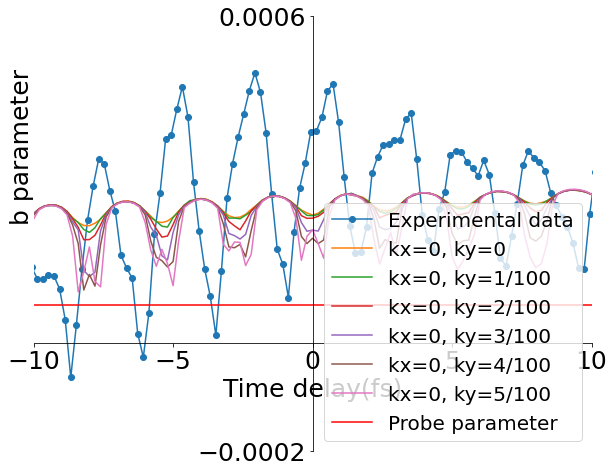

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, b_parameter, '-o')
plt.plot(np.arange(10,-10.2, -0.2), theory_b_param,'-')
plt.plot(np.arange(10,-10.2, -0.2), theory_b_param01,'-')
plt.plot(np.arange(10,-10.2, -0.2), theory_b_param02,'-')
plt.plot(np.arange(10,-10.2, -0.2), theory_b_param03,'-')
plt.plot(np.arange(10,-10.2, -0.2), theory_b_param04,'-')
plt.plot(np.arange(10,-10.2, -0.2), theory_b_param05,'-')
# plt.plot(np.arange(10,-10.2, -0.2), b_param_I2,'-')
plt.axhline(y=probe_param[2], color='r', linestyle='-')
plt.legend(['Experimental data', 'kx=0, ky=0', 'kx=0, ky=1/100','kx=0, ky=2/100','kx=0, ky=3/100','kx=0, ky=4/100','kx=0, ky=5/100', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("b parameter", fontsize=25)
plt.xlim([-10,10])
ax.yaxis.set_label_coords(0, 0.7)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([-0.0002, 0.0006])
# plt.ylim([-0.0006, 0.0006])
# plt.savefig("phase.png")
plt.show()

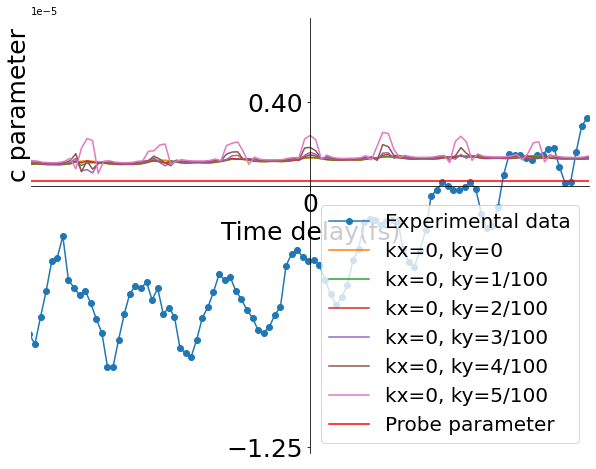

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, c_parameter,'-o')
plt.plot(np.arange(10,-10.2, -0.2), theory_c_param,'-')
plt.plot(np.arange(10,-10.2, -0.2), theory_c_param01,'-')
plt.plot(np.arange(10,-10.2, -0.2), theory_c_param02,'-')
plt.plot(np.arange(10,-10.2, -0.2), theory_c_param03,'-')
plt.plot(np.arange(10,-10.2, -0.2), theory_c_param04,'-')
plt.plot(np.arange(10,-10.2, -0.2), theory_c_param05,'-')
# plt.plot(np.arange(10,-10.2, -0.2), c_param_I2,'-')
plt.axhline(y=probe_param[3], color='r', linestyle='-')
plt.legend(['Experimental data', 'kx=0, ky=0', 'kx=0, ky=1/100','kx=0, ky=2/100','kx=0, ky=3/100','kx=0, ky=4/100','kx=0, ky=5/100', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("c parameter", fontsize=25)
ax.yaxis.set_label_coords(0, 0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xticks([-30, 0, 30])
ax.set_yticks([-0.0000125, 0.000004])
plt.xlim([-10, 10])
# plt.savefig("phase.png")
plt.show()

## Least square fitting

In [ ]:
import lmfit

In [ ]:
model = lmfit.models.ExpressionModel("phi_0 + a*x + b*(x)**2 + c*(x)**3 + d*(x)**4")

{'phi_0': 7.4298022975911e-05, 'a': -0.0010726129606505443, 'b': 6.978583103652299e-05, 'c': 1.5361955466615903e-07, 'd': 3.347014254920841e-08}


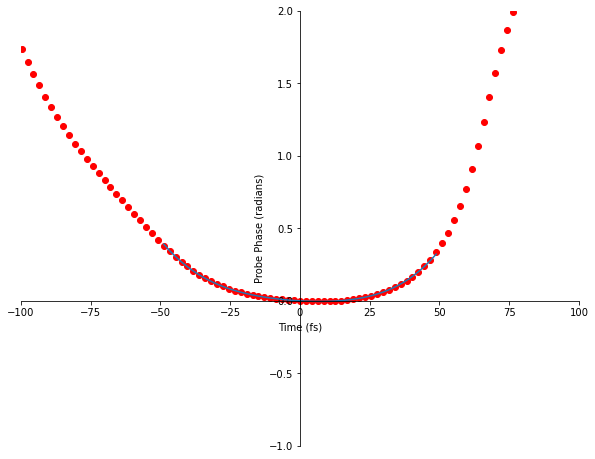

In [ ]:
x = probe_data[:][0]
delaytime_range = np.logical_and(x>=-50, x<=50)
x1 = x[delaytime_range]

y = np.unwrap(probe_data[:][2])
y1 = y[delaytime_range]

probe_param = model.fit(y1, weights=(probe_data[:][1])[delaytime_range]/np.max(probe_data[:][1]), x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
print(probe_param.best_values)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(x, y, color='red')
plt.plot(x1, probe_param.best_fit)
plt.xlabel("Time (fs)")
plt.ylabel("Probe Phase (radians)")
plt.xlim([-100,100])
plt.ylim([-1,2])
plt.show()

In [ ]:
delaytime_array = np.array(delaytime_data)[0] 
time = np.array([float(time_data[i][0]) for i in range(len(time_data.axes[1]))])
delaytime_range = np.logical_and(time>=-50, time<=50)

b_parameter = np.zeros(len(delaytime_array))
c_parameter = np.zeros(len(delaytime_array))
for delay_i in range(len(delaytime_array)):
    x1 = time[delaytime_range]

    y = np.array([phase_data1_45[i][delay_i] for i in range(len(phase_data1_45.axes[1]))])
    y1 = y[delaytime_range]
    
    E_data_delay = np.array([E_data1_45[i][delay_i] for i in range(len(E_data1_45.axes[1]))])
    param = model.fit(y1, weights=(E_data_delay/max(E_data_delay))[delaytime_range], x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
    b_parameter[delay_i] = param.best_values['b']
    c_parameter[delay_i] = param.best_values['c']

In [ ]:
theory_b_parameter = np.zeros(len(theory_df.axes[1])-1)
theory_c_parameter = np.zeros(len(theory_df.axes[1])-1)
for delay_index in range(len(theory_df.axes[1])-1):
    x = theory_data[:,0].real - theory_data[:,0].real[max_E_index(delay_index)]
    delaytime_range = np.logical_and(x>=-50, x<=50)
    x1 = x[delaytime_range]

    y = np.unwrap(arg_data[:,delay_index]) - np.unwrap(arg_data[:,delay_index])[max_E_index(delay_index)]
    y1 = y[delaytime_range]
    
    theory_E_delay = np.array([abs_data[i, delay_index] for i in range(len(theory_data))])
    theory_param = model.fit(y1, weights=(theory_E_delay/max(theory_E_delay))[delaytime_range], x=x1, phi_0=0, a=0, b=0.0005, c=0, d=0)
    theory_b_parameter[delay_index] = theory_param.best_values['b']
    theory_c_parameter[delay_index] = theory_param.best_values['c']

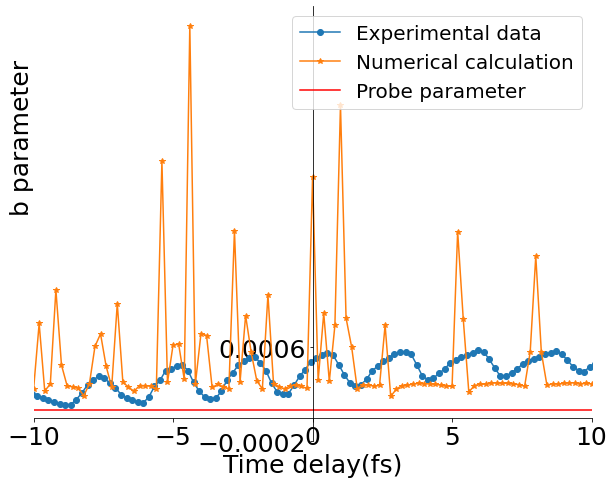

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, b_parameter,'o-')
plt.plot(np.arange(10,-10.2,-0.2), theory_b_parameter, '-*')
plt.axhline(y=probe_param.best_values['b'], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("b parameter", fontsize=25)
plt.xlim([-10,10])
ax.yaxis.set_label_coords(0, 0.7)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_yticks([-0.0002, 0.0006])
# plt.ylim([-0.0009, 0.0015])
# plt.savefig("phase.png")
plt.show()

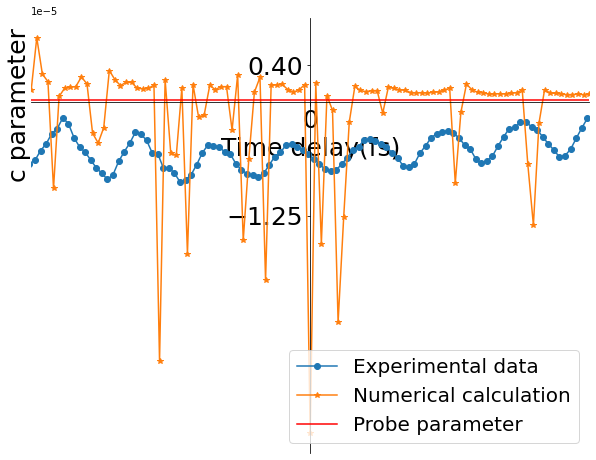

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(10, 8)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(delaytime_array, c_parameter,'o-')
plt.plot(np.arange(10,-10.2,-0.2), theory_c_parameter, '-*')
plt.axhline(y=probe_param.best_values['c'], color='r', linestyle='-')
plt.legend(['Experimental data', 'Numerical calculation', 'Probe parameter'], fontsize=20)
plt.xlabel("Time delay(fs)", fontsize=25)
plt.ylabel("c parameter", fontsize=25)
ax.yaxis.set_label_coords(0, 0.8)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xticks([-30, 0, 30])
ax.set_yticks([-0.0000125, 0.000004])
plt.xlim([-10, 10])
# plt.savefig("phase
#plt.ylim([-0.000025, 0.000015])
# plt.savefig("phase.png")
plt.show()